In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [3]:
train_path = os.getcwd()+'/cats and dogs/training_set'
test_path = os.getcwd() + '/cats and dogs/test_set'

In [4]:
BATCH = 64
IMG_SIZE = 100

In [5]:
def tensor_pipeline():
    train_dataset = keras.preprocessing.image_dataset_from_directory(train_path,
                                                                batch_size=BATCH,
                                                                 image_size=(IMG_SIZE,IMG_SIZE),
                                                                 validation_split=0.2,
                                                                 seed=123,
                                                                 subset='training')
    validation_dataset = keras.preprocessing.image_dataset_from_directory(train_path,
                                                                      batch_size=BATCH,
                                                                      image_size=(100,100),
                                                                      validation_split=0.2,
                                                                      seed=123,
                                                                      subset='validation')
    test_dataset = keras.preprocessing.image_dataset_from_directory(test_path,
                                                                      batch_size=BATCH,
                                                                      image_size=(100,100),)
    Rescale = layers.experimental.preprocessing.Rescaling(1/255.0)
    train_ds = train_dataset.map(lambda x,y : (Rescale(x),y))
    val_ds = validation_dataset.map(lambda x,y : (Rescale(x),y))
    test_ds = test_dataset.map(lambda x,y : (Rescale(x),y))


    # only done for training data in tensorflow guide
    
    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    return train_ds,val_ds,test_ds

In [6]:
def keras_pipeline():
    train_gen = keras.preprocessing.image.ImageDataGenerator(
                                                            rescale= 1./255,
                                                            rotation_range=40,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True)
    test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
    
    train_gen = train_gen.flow_from_directory(train_path,target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH,class_mode='binary')
    test_gen = test_gen.flow_from_directory(test_path,target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH,class_mode='binary')
    return train_gen ,test_gen

In [7]:
per_epoch_stop = math.ceil(8005/BATCH)
per_epoch_stop_val = math.ceil(2023/BATCH)

In [8]:
train_gen,test_gen = keras_pipeline()

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
for a in test_dataset.take(1):
    print(a[1])
    break

In [39]:
model = keras.Sequential([
    layers.Input(shape=(100,100,3)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.5),    
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [41]:
model.compile(loss = keras.losses.BinaryCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

In [42]:
hist = model.fit(train_gen,epochs=10,steps_per_epoch=per_epoch_stop,
                 validation_data=test_gen,validation_steps=per_epoch_stop_val)

Epoch 1/10


2021-09-30 07:47:19.657369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - ETA: 0s - loss: 0.6825 - acc: 0.5543

2021-09-30 07:47:38.665266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 22s 170ms/step - loss: 0.6825 - acc: 0.5543 - val_loss: 0.6604 - val_acc: 0.6065
Epoch 2/10
126/126 [==============================] - 22s 171ms/step - loss: 0.6563 - acc: 0.6064 - val_loss: 0.6367 - val_acc: 0.6362
Epoch 3/10
126/126 [==============================] - 22s 170ms/step - loss: 0.6442 - acc: 0.6267 - val_loss: 0.6288 - val_acc: 0.6510
Epoch 4/10
126/126 [==============================] - 22s 170ms/step - loss: 0.6341 - acc: 0.6423 - val_loss: 0.5949 - val_acc: 0.6970
Epoch 5/10
126/126 [==============================] - 22s 171ms/step - loss: 0.6156 - acc: 0.6602 - val_loss: 0.6125 - val_acc: 0.6530
Epoch 6/10
126/126 [==============================] - 22s 170ms/step - loss: 0.5969 - acc: 0.6753 - val_loss: 0.5539 - val_acc: 0.7247
Epoch 7/10
126/126 [==============================] - 22s 171ms/step - loss: 0.5789 - acc: 0.6934 - val_loss: 0.5308 - val_acc: 0.7365
Epoch 8/10
126/126 [==============================] - 21s 169ms/st

In [43]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

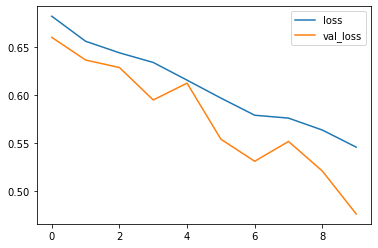

In [44]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

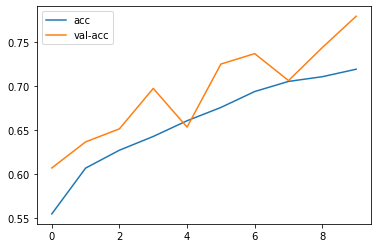

In [45]:
plt.plot(hist.history['acc'],label='acc')
plt.plot(hist.history['val_acc'],label='val-acc')
plt.legend()

In [28]:
def show(layers,images,filter_index=0,size=15):
    """
    layers : conv2d and maxpooling layers
    images : 
    """
    
    fig,ax = plt.subplots(len(images),len(layers)+1)
    fig.set_figheight(size)
    fig.set_figwidth(size)
    for i,img in enumerate(images):
        ax[i][0].imshow(img)
        out = img[np.newaxis,...]
        for l,layer in enumerate(layers):
            out = layer(out)
            ax[i][l+1].imshow(out[0,:,:,filter_index])

In [ ]:
batch = []
for each in train_ds.take(1):
    batch.append(augment(each[0]))

In [29]:
batch = []
for each in next(train_gen):
    batch.append(each)
    break

In [34]:
model.layers

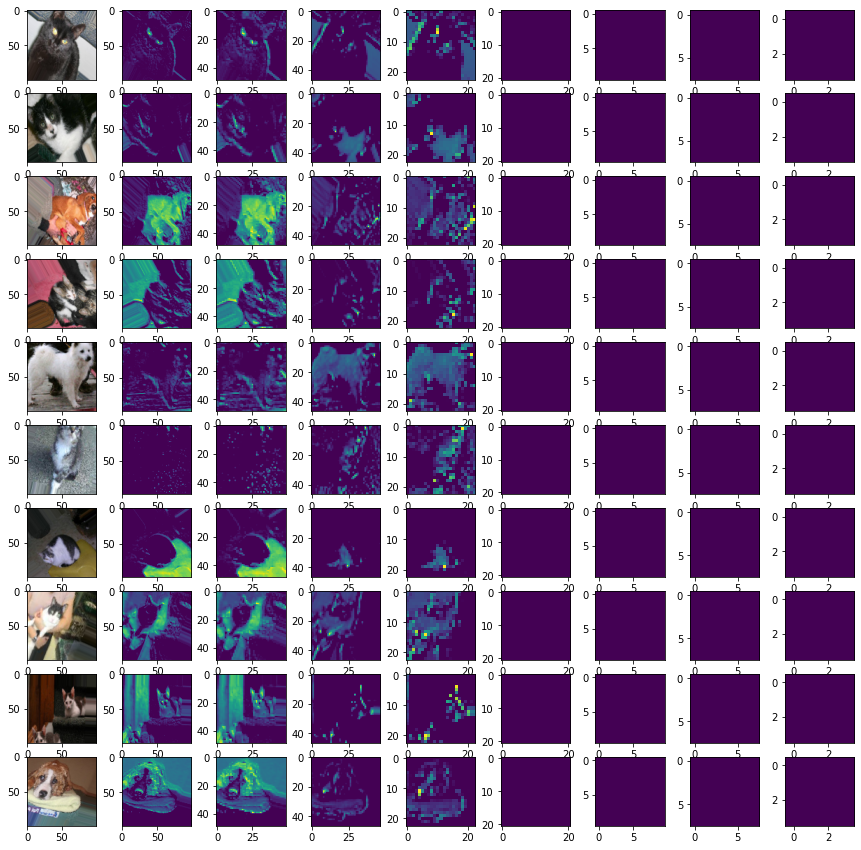

In [51]:
show(model.layers[:8],batch[0][:10],filter_index=5)

In [ ]:
np.newaxis